привет

In [2]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения


,п»ї,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,в‚¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,в‚¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,в‚¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,в‚¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,в‚¬196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,в‚¬143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,в‚¬113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,в‚¬165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,в‚¬143K


In [8]:
data = pd.read_csv('./new.csv', sep=',',engine = 'python')
data

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value(M $),Wage(K $),...,Post,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565,...,FRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77,405,...,FRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290,...,FRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72,260,...,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102,355,...,MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,0.06,1,...,MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18203,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,0.06,1,...,FRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18204,18204,241638,B. Worman,16,England,47,67,Cambridge United,0.06,1,...,FRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18205,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,0.06,1,...,FRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value(M $)', 'Wage(K $)', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Real Face', 'Position',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'Release Clause(M)',
       'Post', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58'],
      dtype='object')

In [19]:
data['Post']

0        FRW
1        FRW
2        FRW
3         GK
4        MED
        ... 
18202    MED
18203    FRW
18204    FRW
18205    FRW
18206    MED
Name: Post, Length: 18207, dtype: object

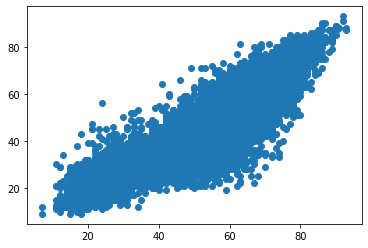

In [23]:
plt.scatter(data["ShortPassing"], data["LongPassing"])
pass

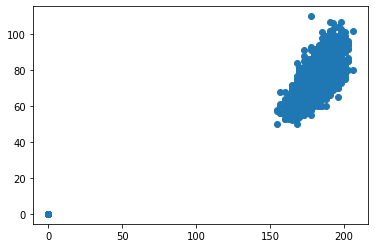

In [24]:
plt.scatter(data["Height"], data["Weight"])
pass

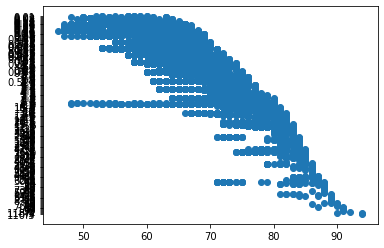

In [25]:
plt.scatter(data["Overall"], data["Value(M $)"])
pass

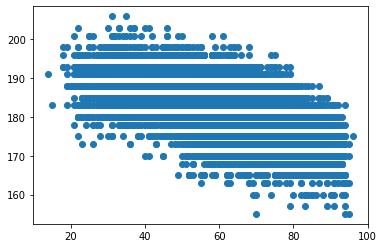

In [26]:
plt.scatter(data["Agility"], data["Height"])
pass

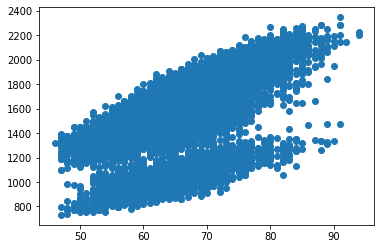

In [27]:
plt.scatter(data["Overall"], data["Special"])
pass

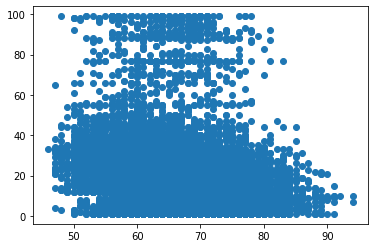

In [28]:
plt.scatter(data["Overall"], data["Jersey Number"])
pass

In [29]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,Weak Foot,Skill Moves,Jersey Number,Height,...,Release Clause(M),Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18179.000000,18131.000000,18131.000000,18119.000000,18207.000000,...,18207.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.947907,2.947217,2.361701,19.544401,180.478387,...,4.187231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.585019,0.660462,0.756292,15.952570,13.496024,...,10.706080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1458.000000,3.000000,2.000000,8.000000,175.000000,...,0.390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,3.000000,2.000000,17.000000,180.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,3.000000,3.000000,26.000000,185.000000,...,2.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,99.000000,206.000000,...,228.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.describe(include=['category'])

ValueError: No objects to concatenate